In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd

In [10]:
# http://streamlit.informatics.uab.edu:8501/
# http://gbmpdxu01.informatics.uab.edu:8501/
import streamlit as st
import pandas as pd
import requests
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
st.title('U-BRITE Tech Demo')
def load_deg_results(workingdir):
    # See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html.
    expSet=[]
    names=[x for x in os.walk("./"+workingdir+"/")]
    f = []
    for (dirpath, dirnames, filenames) in os.walk("./"+workingdir+"/"):
        f.extend(filenames)
        break
    
    NewNames=[]
    for name in f:
        if(len(re.findall("DE_Results", name))>0):
            NewNames.append(name)
    NewNames.sort()
    print(NewNames)
    for newName in NewNames:
        prefixPtn = re.compile(r'([a-z|0-9|A-Z|_]+)_sig')
        pfx=prefixPtn.findall(newName)
        tables_pd = pd.read_table("./"+workingdir+"/"+newName)
        expSet.append([pfx[0],tables_pd])
    return expSet
workingdir = 'Pancreas Organoid'
degs = load_deg_results(workingdir)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

['Pancreas_hESC_SARS_CoV_2_sig_DE_Results.txt']


In [11]:
degs

[['Pancreas_hESC_SARS_CoV_2',
      Unnamed: 0     baseMean  log2FoldChange     lfcSE      stat        pvalue  \
  0        ABCB1   311.794834        0.978388  0.162199  6.032028  1.619150e-09   
  1        ABCB4    43.232305       -1.073487  0.306618 -3.501056  4.634190e-04   
  2       ACVR1C  1694.744341       -0.621906  0.115858 -5.367815  7.969640e-08   
  3        ADCY8    71.976524        0.830616  0.241009  3.446418  5.680707e-04   
  4       AGPAT2  1255.116538        0.687269  0.146067  4.705165  2.536602e-06   
  ..         ...          ...             ...       ...       ...           ...   
  227       VNN3    34.190586        2.821605  0.458376  6.155652  7.476908e-10   
  228       VWA1  1880.097318        0.736441  0.152302  4.835406  1.328742e-06   
  229       WNT4   376.969833        0.939109  0.137237  6.842950  7.757887e-12   
  230       XBP1  7143.756502        0.338188  0.095843  3.528572  4.178089e-04   
  231    ZC3H12A   373.972576        0.658040  0.141984  

In [23]:

a = dict()
a.keys()
a = 1
b=2
c = {'a':1,'b':1}
[key for (key,val) in c.items() if val ==1]
c = pd.DataFrame([c])


dict_keys([])

['a', 'b']

In [40]:
c['b'][c['a'].isin([1])]
~a == 1

0    1
Name: b, dtype: int64

False

In [17]:
# load DEGs

expSet=[]
names=[x for x in os.walk("./")]
f = []
for (dirpath, dirnames, filenames) in os.walk("./"):
    f.extend(filenames)
    break
NewNames=[]
for name in f:
    if(len(re.findall("DE_Results", name))>0):
        NewNames.append(name)
for newName in NewNames:
    prefixPtn = re.compile(r'[^_]+')
    pfx=prefixPtn.findall(newName)
    expSet.append([pfx[0],pd.read_table(newName)])
    

In [33]:
degs=expSet
sampleNames=[]
for i in range(0,len(degs)):
    sampleNames.append(degs[i][0])

In [38]:
sampleNames
orderExpect=['JX12T','jx14P','jx14T','x1066','x1465','x1153','x1516']
orderIdx=[sampleNames.index(i) for i in orderExpect]
sampleNames

['JX12T', 'jx14P', 'jx14T', 'jx39P', 'x1066', 'x1153', 'x1465', 'x1516']

In [109]:
a = np.array([[1,2,3],[4,5,6],[0,0,1],[7,7,7]])
np.array(a)[::,[2,1,0]]
#a=np.random.randn(50, 3)
np.array(sorted(a,key=lambda a:a[1], reverse=True))
sorted(a,key=lambda x:np.sum(x[0:np.size(a,0)-1]), reverse=True)
import re
re.sub("_[^_]+","",'tax_aaasfas')

'tax'

In [69]:
range(np.size(a,0)-1)

range(0, 49)

In [12]:
def run_pager(genes, sources, fdr):
	# Set up the call parameters as a dict.
	params = {}
	# Work around PAGER API form encode issue.
	params['genes'] = '%20'.join(genes)
	params['source'] = '%20'.join(sources)
	params['type'] = 'All'
	params['sim'] = '0.01'
	params['olap'] = '1'
	params['organism'] = 'All'
	params['cohesion'] = '0'
	params['pvalue'] = 0.05
	params['FDR'] = fdr
	params['ge'] = 1
	params['le'] = 2000

	response = requests.post('http://discovery.informatics.uab.edu/PAGER/index.php/geneset/pagerapi', data=params)
#	print(response.request.body)
	return pd.DataFrame(response.json())


In [13]:
sources = st.multiselect('Data sources',
	('KEGG', 'WikiPathway', 'BioCarta', 'MSigDB', 'Reactome', 'Spike'),
	('KEGG', 'WikiPathway')
)
fdr = st.slider('FDR cutoff', 0.0, 1.0, 0.05, 0.01)
PAGERSet=[]
deg_names=[]
pag_ids=[]
PAG_val=dict()
for deg in degs:
    deg_name=deg[0]
    deg_names.append(deg_name)
    deg_results=deg[1]
    genes = [x for x in deg_results['symbol'].tolist() if str(x) != 'nan']
    #print(genes)
    pager_output = run_pager(genes, sources, fdr)
    if(len(pager_output.index)>0):
        for row in pager_output.iloc[:,[0,1,-1]].values:
            pag_id=str(row[0])+"_"+str(row[1])
            pag_ids=pag_ids+[pag_id]
            val=-np.log(row[2])
            PAG_val[deg_name+pag_id]=val
    PAGERSet.append([deg_name,pager_output])

In [14]:
PAGERSet

[['Pancreas_hESC_SARS_CoV_2',
          GS_ID                                       NAME       SOURCE GS_SIZE  \
  0   WAG000822                    Bisphenol A degradation         KEGG       4   
  1   WIG002015        Type II interferon signaling (IFNG)  WikiPathway      36   
  2   WIG001915                Cell Differentiation - meta  WikiPathway      19   
  3   WAG000394              Tetrachloroethene degradation         KEGG      19   
  4   WAG001438     Nicotinate and nicotinamide metabolism         KEGG      20   
  5   WIG001960                     IL-6 signaling pathway  WikiPathway      42   
  6   WAG000374                        Allograft rejection         KEGG      22   
  7   WAG001620        Complement and coagulation cascades         KEGG      65   
  8   WIG002008        Complement and Coagulation Cascades  WikiPathway      49   
  9   WAG001607                  Graft-versus-host disease         KEGG      24   
  10  WAG000196                   Type I diabetes mellitu

In [4]:
pager_output.iloc[:,[0,1,-1]].values

array([['WAG001617', 'ECM-receptor interaction', 2.0400824454056e-07],
       ['WIG002036', 'Vitamin A and carotenoid metabolism',
        0.0088806159569889],
       ['WIG001949', 'Focal Adhesion', 1.7749359096115e-07],
       ['WIG001925', 'Neural Crest Differentiation', 8.2500834759885e-05],
       ['WAG001615', 'p53 signaling pathway', 0.0018454435787162],
       ['WAG000375', 'Focal adhesion', 1.4304221879222e-05],
       ['WIG001887', 'Folate Metabolism', 0.016409376440557],
       ['WIG001867', 'Vitamin B12 Metabolism', 0.041668317097392],
       ['WIG001987', 'Endochondral Ossification', 0.021685147756871],
       ['WAG001609', 'Cell adhesion molecules (CAMs)', 0.014978942760322],
       ['WAG000796', 'MAPK signaling pathway', 0.0090237080351313],
       ['WIG001945', 'Myometrial Relaxation and Contraction Pathways',
        0.043552172744896]], dtype=object)

In [5]:
deg_name

'x1516'

In [6]:
pag_ids=list(set(pag_ids))
print(len(pag_ids))
print(len(deg_names))
mtx=np.zeros((len(pag_ids), len(deg_names)))
for pag_idx in range(0,len(pag_ids)):
    for name_idx in range(0,len(deg_names)):
        if(deg_names[name_idx]+pag_ids[pag_idx] in PAG_val.keys()):
            mtx[pag_idx,name_idx]=PAG_val[deg_names[name_idx]+pag_ids[pag_idx]]

133
8


In [9]:
mtx

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 8.12248283, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 4.83386126, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.02254585, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.5113516 , 0.        ,
        0.        ]])

In [7]:
#https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
%pylab inline
matplotlib.use('Agg')
# Plot it out
#fig = plt.figure()

fig, ax = plt.subplots(figsize=(5, len(deg_names)*3))#
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(mtx, cmap=plt.cm.Blues,aspect="auto")

# We want to show all ticks...
ax.set_xticks(np.arange(len(deg_names)))
ax.set_yticks(np.arange(len(pag_ids)))
# ... and label them with the respective list entries
ax.set_xticklabels(deg_names)
ax.set_yticklabels(pag_ids)
ax.xaxis.tick_top()
# create color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("-log(P)", rotation=-90, va="bottom")
# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",  rotation_mode="anchor")
plt.xticks(rotation=90)
# Loop over data dimensions and create text annotations.
#for i in range(len(pag_ids)):
#    for j in range(len(deg_names)):
        #text = ax.text(j, i, mtx[i, j],ha="center", va="center", color="w")

#ax.set_title("sample-PAG associations")
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
plt.show()
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.savefig("./heatmap.png", dpi=100,transparent = True, bbox_inches = 'tight', pad_inches = 0)


Populating the interactive namespace from numpy and matplotlib


c:\users\yzlco\anaconda2\envs\py36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [8]:

#%pylab inline
# Plot it out
fig, ax = plt.subplots()

ax.pcolor(mtx, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()

fig.set_size_inches(8, len(deg_names)*2.5)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(mtx.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(mtx.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels


# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(deg_names, minor=False)
ax.set_yticklabels(pag_ids, minor=False)

# rotate the
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

array([[ 1.58731512,  0.43276026,  0.5307594 ],
       [-0.0712542 , -1.51382946,  0.68838762],
       [ 0.21813554, -0.04323119, -0.56883382],
       [-1.31060517,  0.76708777, -1.32819484],
       [ 1.12514911, -1.05661996, -1.50867757],
       [-1.03471132,  2.17460017,  1.42308765],
       [ 0.13467146,  0.37027525, -0.71467096],
       [-0.66209462, -1.06560329, -0.27087517],
       [ 1.36287488, -1.19361666,  0.65407776],
       [-1.6162714 , -0.39620185, -0.33069811],
       [-0.4876385 ,  0.36537292, -0.64215147],
       [-0.13359458,  0.43600528, -0.80045914],
       [ 0.65556118,  0.42637337,  0.95428245],
       [ 0.16303301, -0.37556645,  0.31741968],
       [ 0.86987428, -0.24396878, -1.2625273 ],
       [ 0.90574683,  0.13675129, -1.18767779],
       [ 0.09295663, -0.42023092, -0.33726022],
       [-1.47266501, -2.35937641, -1.16830653],
       [ 0.351728  , -0.19647056,  0.49618049],
       [-0.09560635,  0.05775162,  0.05566693]])

In [9]:
# gene network in PAG
def run_pager_int(PAGid):
	response = requests.get('http://discovery.informatics.uab.edu/PAGER/index.php/pag_mol_mol_map/interactions/'+PAGid)
#	print(response.request.body)
	return pd.DataFrame(response.json())

In [10]:
PAGid=pager_output.iloc[:,[0,1,-1]].values[0][0]
geneInt=run_pager_int(PAGid)

In [11]:
### generate PPI data ### 
#geneInt['data']
idx2symbol = dict()
idx=0
idxPair=[]
PPI=[]
for pair in geneInt['data']:
    if not pair['SYM_A'] in idx2symbol.values():
        idx2symbol[idx] = pair['SYM_A']
        SYM_A_idx=idx
        idx+=1
        #print(SYM_A_idx)
    else:
        SYM_A_idx=[name for name, vals in idx2symbol.items() if vals == pair['SYM_A']][0]
    if not pair['SYM_B'] in idx2symbol.values():
        idx2symbol[idx]=pair['SYM_B']
        SYM_B_idx=idx
        idx+=1
        #print(SYM_B_idx)
    else:
        SYM_B_idx=[name for name, vals in idx2symbol.items() if vals == pair['SYM_B']][0]   
    idxPair.append((SYM_A_idx,SYM_B_idx))
    PPI.append((pair['SYM_A'],pair['SYM_B']))

In [12]:
# spring force layout
import networkx as nx
G=nx.Graph()
G.add_nodes_from(idx2symbol.values())
G.add_edges_from(PPI)
pos=nx.spring_layout(G, dim=2, k=None, pos=None, fixed=None, iterations=50, weight='weight', scale=1.0,seed =1)

Unnamed: 0     baseMean  log2FoldChange     lfcSE       stat  \
0    ENSG00000204186  1178.017421        3.832706  0.202555  18.921793   
1    ENSG00000204248  3328.899442        4.604906  0.264176  17.431226   
2    ENSG00000180543   517.637319       -7.583594  0.436351 -17.379580   
3    ENSG00000283994   326.327205        6.410787  0.413395  15.507662   
4    ENSG00000185686   472.686779        6.191401  0.420480  14.724598   
..               ...          ...             ...       ...        ...   
857  ENSG00000161921   205.159684        1.096397  0.358522   3.058106   
858  ENSG00000067113  1283.941460       -0.682163  0.223232  -3.055847   
859  ENSG00000139433  2929.165586       -0.706525  0.231205  -3.055833   
860  ENSG00000130147  2624.569003        0.652933  0.213793   3.054041   
861  ENSG00000287542    84.022822       -1.582695  0.518405  -3.053008   

           pvalue          padj   symbol          ensembl external_gene  \
0    7.544432e-80  1.432914e-75    ZDBF2  ENSG00000204186         ZDBF2   
1    4.780979e-68  4.540257e-64  COL11A2  ENSG00000204248       COL11A2   
2    1.178126e-67  7.458714e-64   TSPYL5  ENSG00000180543        TSPYL5   
3    3.078865e-54  1.461922e-50      NaN  ENSG00000283994    AC092652.3   
4    4.481272e-49  1.702256e-45    PRAME  ENSG00000185686         PRAME   
..            ...           ...      ...              ...           ...   
857  2.227411e-03  4.930679e-02   CXCL16  ENSG00000161921        CXCL16   
858  2.244259e-03  4.956644e-02    PLPP1  ENSG00000067113         PLPP1   
859  2.244361e-03  4.956644e-02     GLTP  ENSG00000139433          GLTP   
860  2.257813e-03  4.980562e-02   SH3BP4  ENSG00000130147        SH3BP4   
861  2.265602e-03  4.991946e-02      NaN  ENSG00000287542    AC098582.1   

       gene_biotype                                        description  \
0    protein_coding  zinc finger DBF-type containing 2 [Source:HGNC...   
1    protein_coding  collagen type XI alpha 2 chain [Source:HGNC Sy...   
2    protein_coding    TSPY like 5 [Source:HGNC Symbol;Acc:HGNC:29367]   
3            lncRNA       novel transcript, sense intronic to ARHGAP15   
4    protein_coding  preferentially expressed antigen in melanoma [...   
..              ...                                                ...   
857  protein_coding  C-X-C motif chemokine ligand 16 [Source:HGNC S...   
858  protein_coding  phospholipid phosphatase 1 [Source:HGNC Symbol...   
859  protein_coding  glycolipid transfer protein [Source:HGNC Symbo...   
860  protein_coding  SH3 domain binding protein 4 [Source:HGNC Symb...   
861  protein_coding  HECT and RLD domain containing E3 ubiquitin pr...   

    chromosome_name  start_position  end_position  strand  
0                 2       206274663     206314427       1  
1                 6        33162681      33192499      -1  
2                 8        97273474      97277964      -1  
3                 2       143601517     143608759       1  
4                22        22547701      22559361      -1  
..              ...             ...           ...     ...  
857              17         4733533       4739928      -1  
858               5        55424854      55534969      -1  
859              12       109850945     109880541      -1  
860               2       234952017     235055714       1  
861               4        88523810      88708450       1  

[862 rows x 16 columns]

In [13]:
# expression data
deg=degs[0]
sampleName=deg[0]
deg_results=deg[1]
genesExp = [x for x in deg_results[['symbol','log2FoldChange']].values.tolist() if str(x[0]) != 'nan']
# expression data in network
expInNetwork=np.array(genesExp)[np.logical_or.reduce([np.array(genesExp)[:,0] == x for x in idx2symbol.values()])].tolist()
zeroInNetwork=[[i,'0'] for i in idx2symbol.values() if i not in np.array(expInNetwork)[:,0]]
for i in zeroInNetwork:
    expInNetwork.append(i)
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':np.array(expInNetwork)[:,0], 'myvalue':[np.float(i) for i in np.array(expInNetwork)[:,1]] })
# Plot it, providing a continuous color scale with cmap:
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())

In [14]:
import matplotlib
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
class generateNetwork():
    def __new__(self,carac,pos,PPI):

        top = cm.get_cmap('Blues_r', 56)
        bottom = cm.get_cmap('Reds', 56)
        newcolors = np.vstack((top(np.linspace(0, 1, 56)),([[1,1,1,0]]),
                       bottom(np.linspace(0, 1, 56))))
        newcmp = ListedColormap(newcolors, name='RedBlue')
        ### end color scale ###
        fig = plt.figure(figsize=[30,30])
        ax = fig.add_subplot(111)
        plt.axis('off')

        ### network layer ###
        X=nx.Graph()
        X.add_nodes_from(pos.keys())
        ## edge layout ##
        X.add_edges_from(PPI)
        d = dict(X.degree)

        ### maxiumum boundary
        upper=abs(np.max(carac['myvalue'].tolist()))
        if abs(np.min(carac['myvalue'].tolist()))>upper:
            upper=abs(np.min(carac['myvalue'].tolist()))
        if(upper==0):
            upper=1
        nx.draw_networkx_edges(X, pos, edgelist=PPI, edge_color='black', arrows=False, alpha =0.2,size=0.1)
        nx.draw_networkx_nodes(X, pos, with_labels=False, node_color=carac['myvalue'],
                               vmin=-upper, vmax=upper, cmap=newcmp,
                               alpha =0.4,node_size=[int(np.log(i+1)*200) for i in d.values()])
        
        for n, p in pos.items():
            X.node[n]['pos'] = p
            # add text # transform=ax.transAxes,
            ax.text(p[0],p[1],n,verticalalignment='center', horizontalalignment='center',
                    color='black', alpha=1, fontsize=np.log(d[n]+1)/np.log(10)*10)
        #nx.draw(X, pos, node_size=[v * 10 for v in d.values()])
        #print(d)
        #cbar = plt.colorbar()
        #cbar.ax.tick_params(labelsize=50)
        plt.show()
        return(plt)

In [25]:
np.random.randn(20, 3)

array([[-1.18664791,  0.36504703, -2.20513694],
       [ 1.28954237,  1.91345178, -0.77325867],
       [ 0.6740148 , -0.45540365,  0.50096709],
       [-0.69326074, -1.39322928, -0.56353642],
       [-0.7814723 ,  1.43223383,  0.97780158],
       [ 2.53078311,  0.27602144,  1.5582958 ],
       [-0.70729383,  0.66917187,  0.42537661],
       [-0.12064991,  1.61943145,  1.61202609],
       [-0.93523566,  1.60254038, -0.82200087],
       [ 0.82006501,  0.34340546,  0.79403249],
       [ 0.71343388,  1.54595958,  0.95352051],
       [ 0.38761126,  1.14755632, -0.18425965],
       [-1.4319406 , -0.10845533, -0.76260364],
       [ 2.9888767 ,  0.68287167,  0.77405244],
       [ 1.302254  ,  1.1253178 , -2.44692239],
       [ 0.37282995, -2.23368118, -0.35398601],
       [ 1.63564702, -0.2069106 , -0.66337274],
       [-1.65069877,  0.09895218, -0.64981808],
       [-1.68628383, -1.85363147,  1.11874385],
       [-0.90215812,  0.72050812, -0.88634778]])

In [29]:
PAGid

'WAG001617'

Populating the interactive namespace from numpy and matplotlib


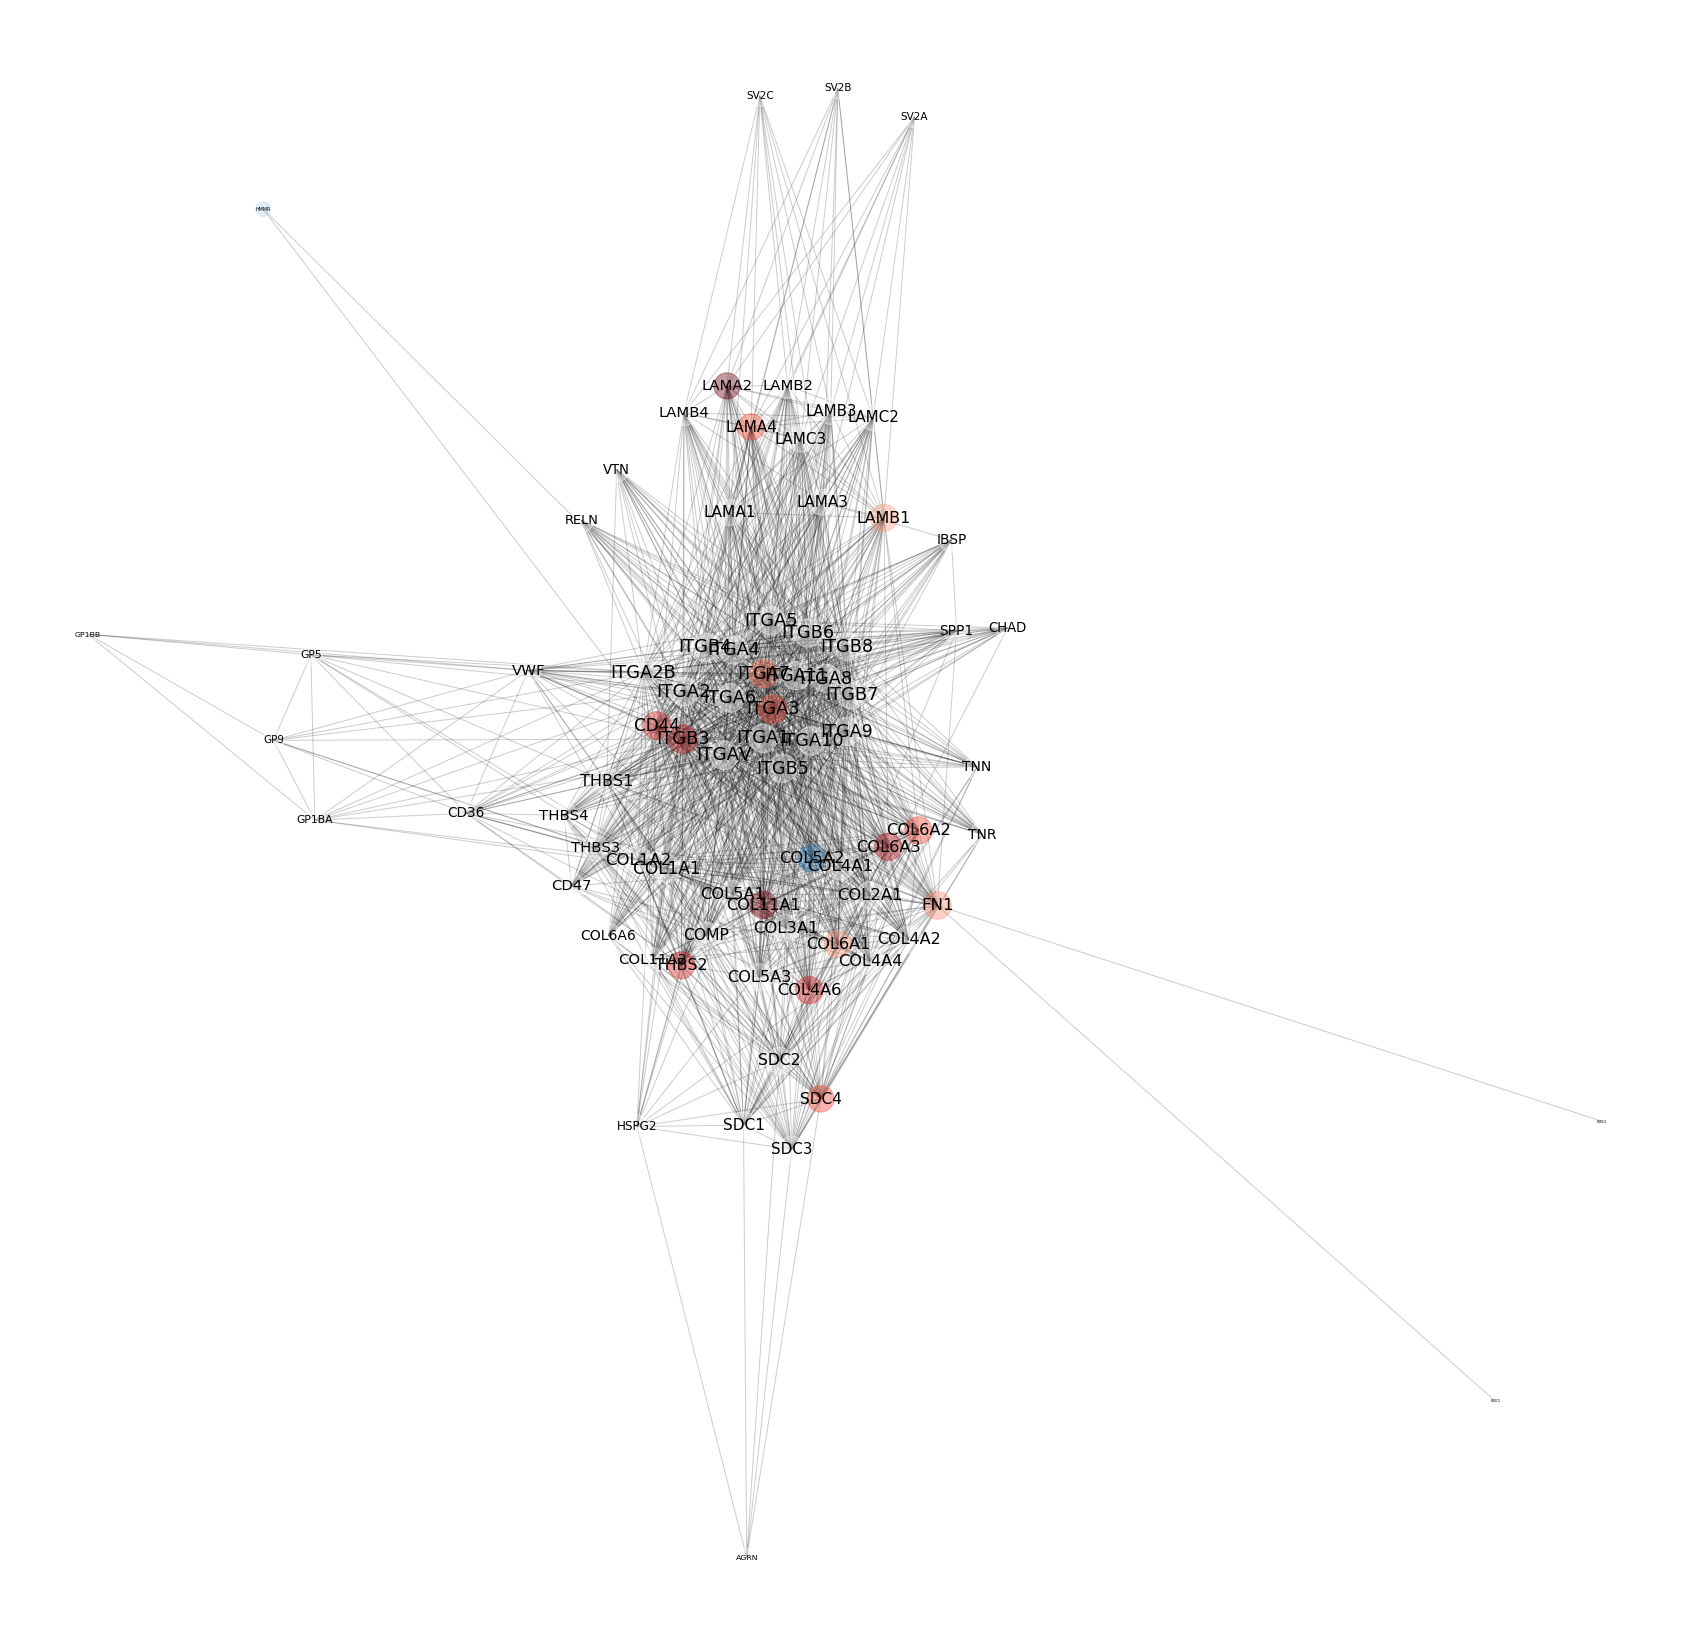

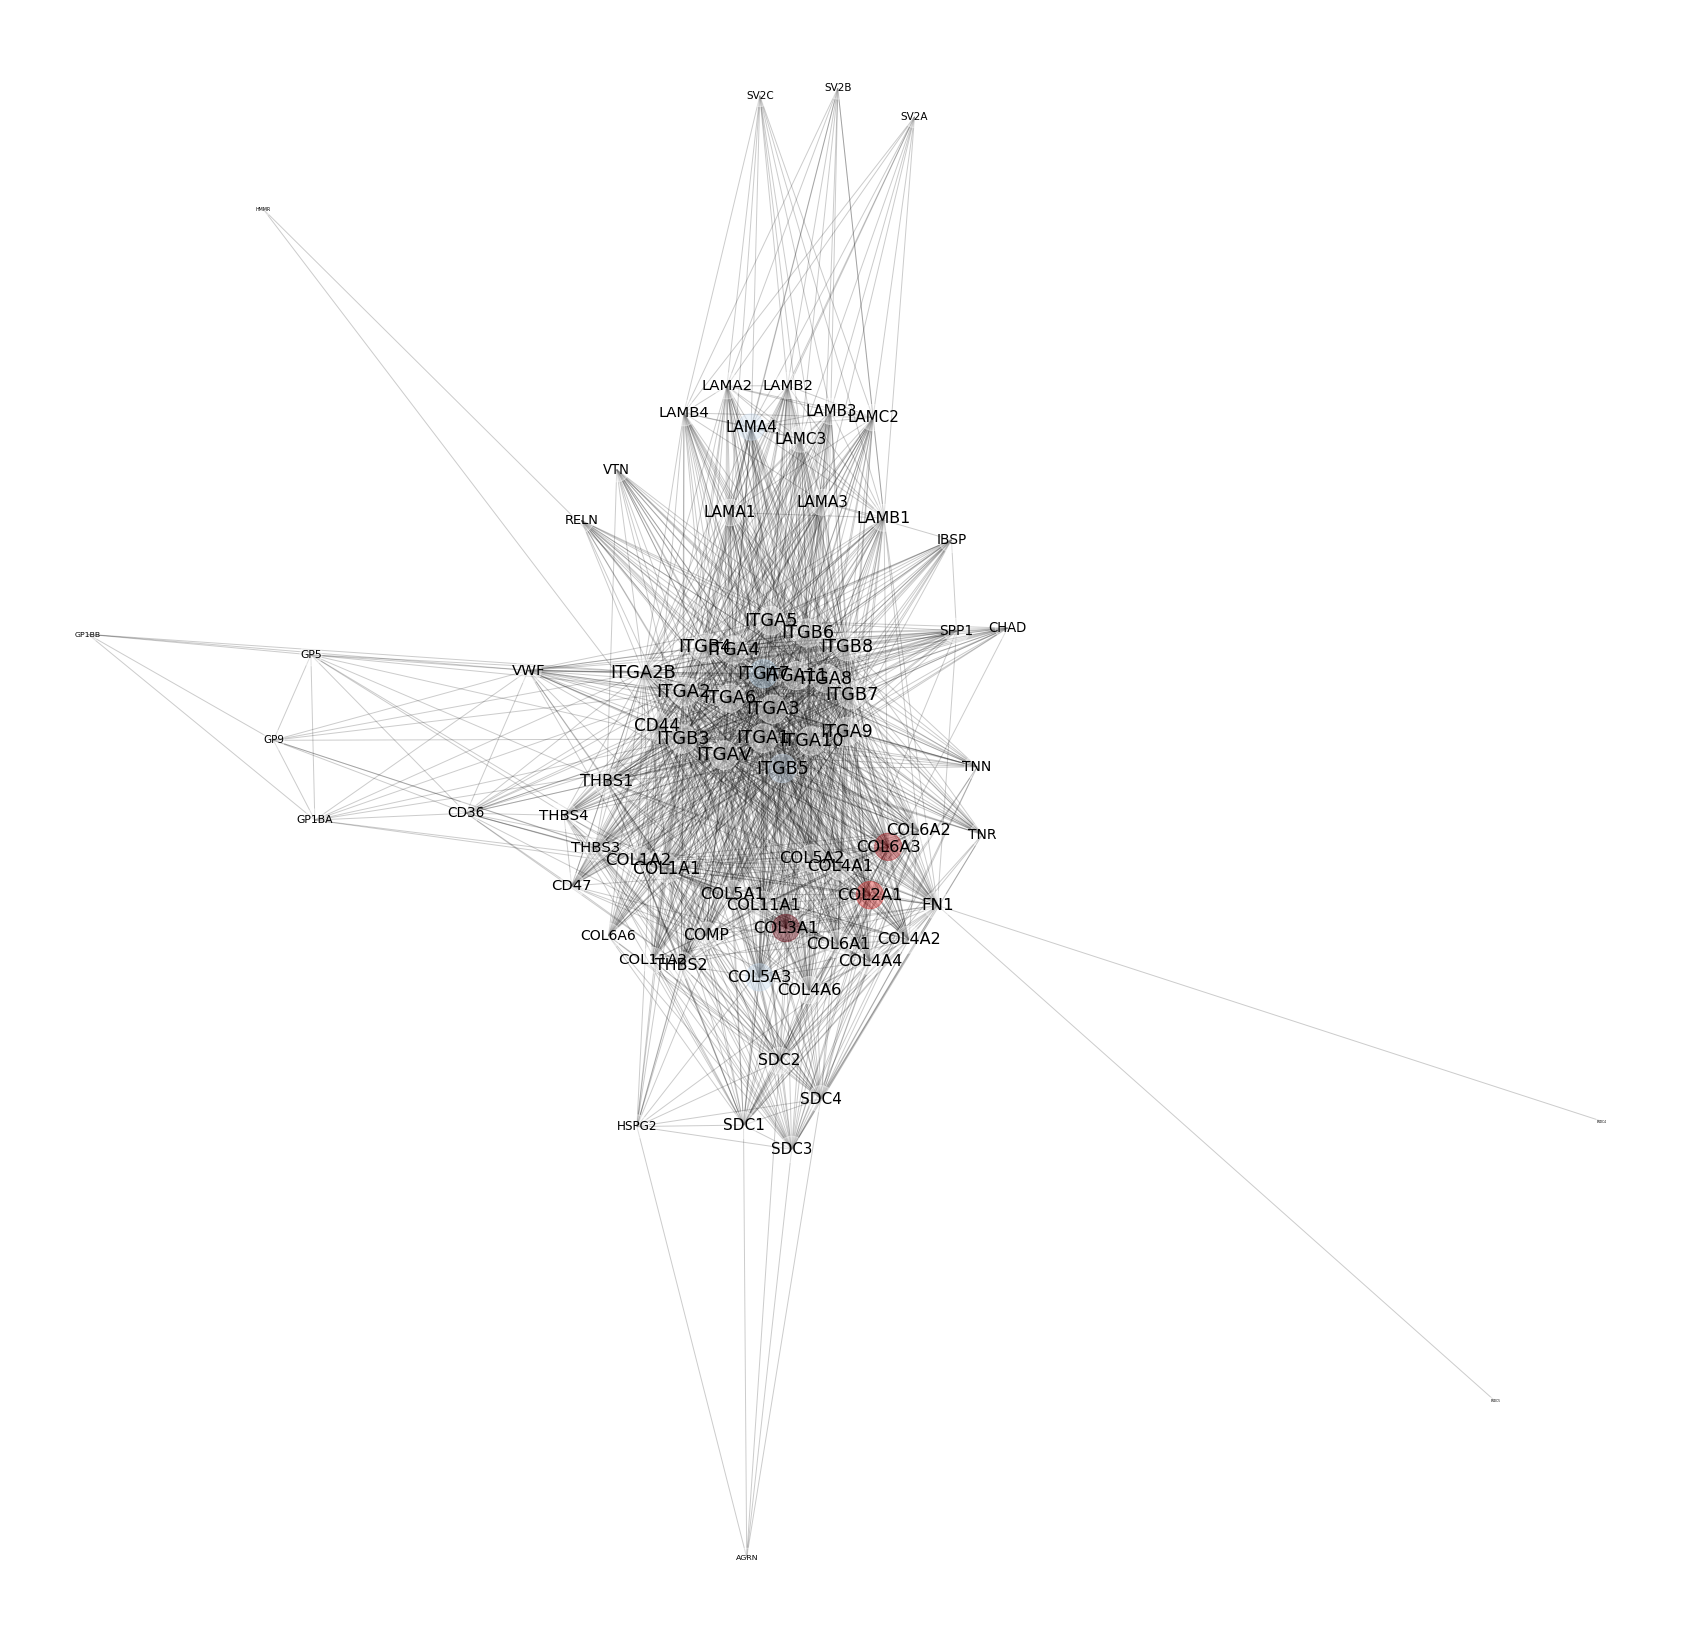

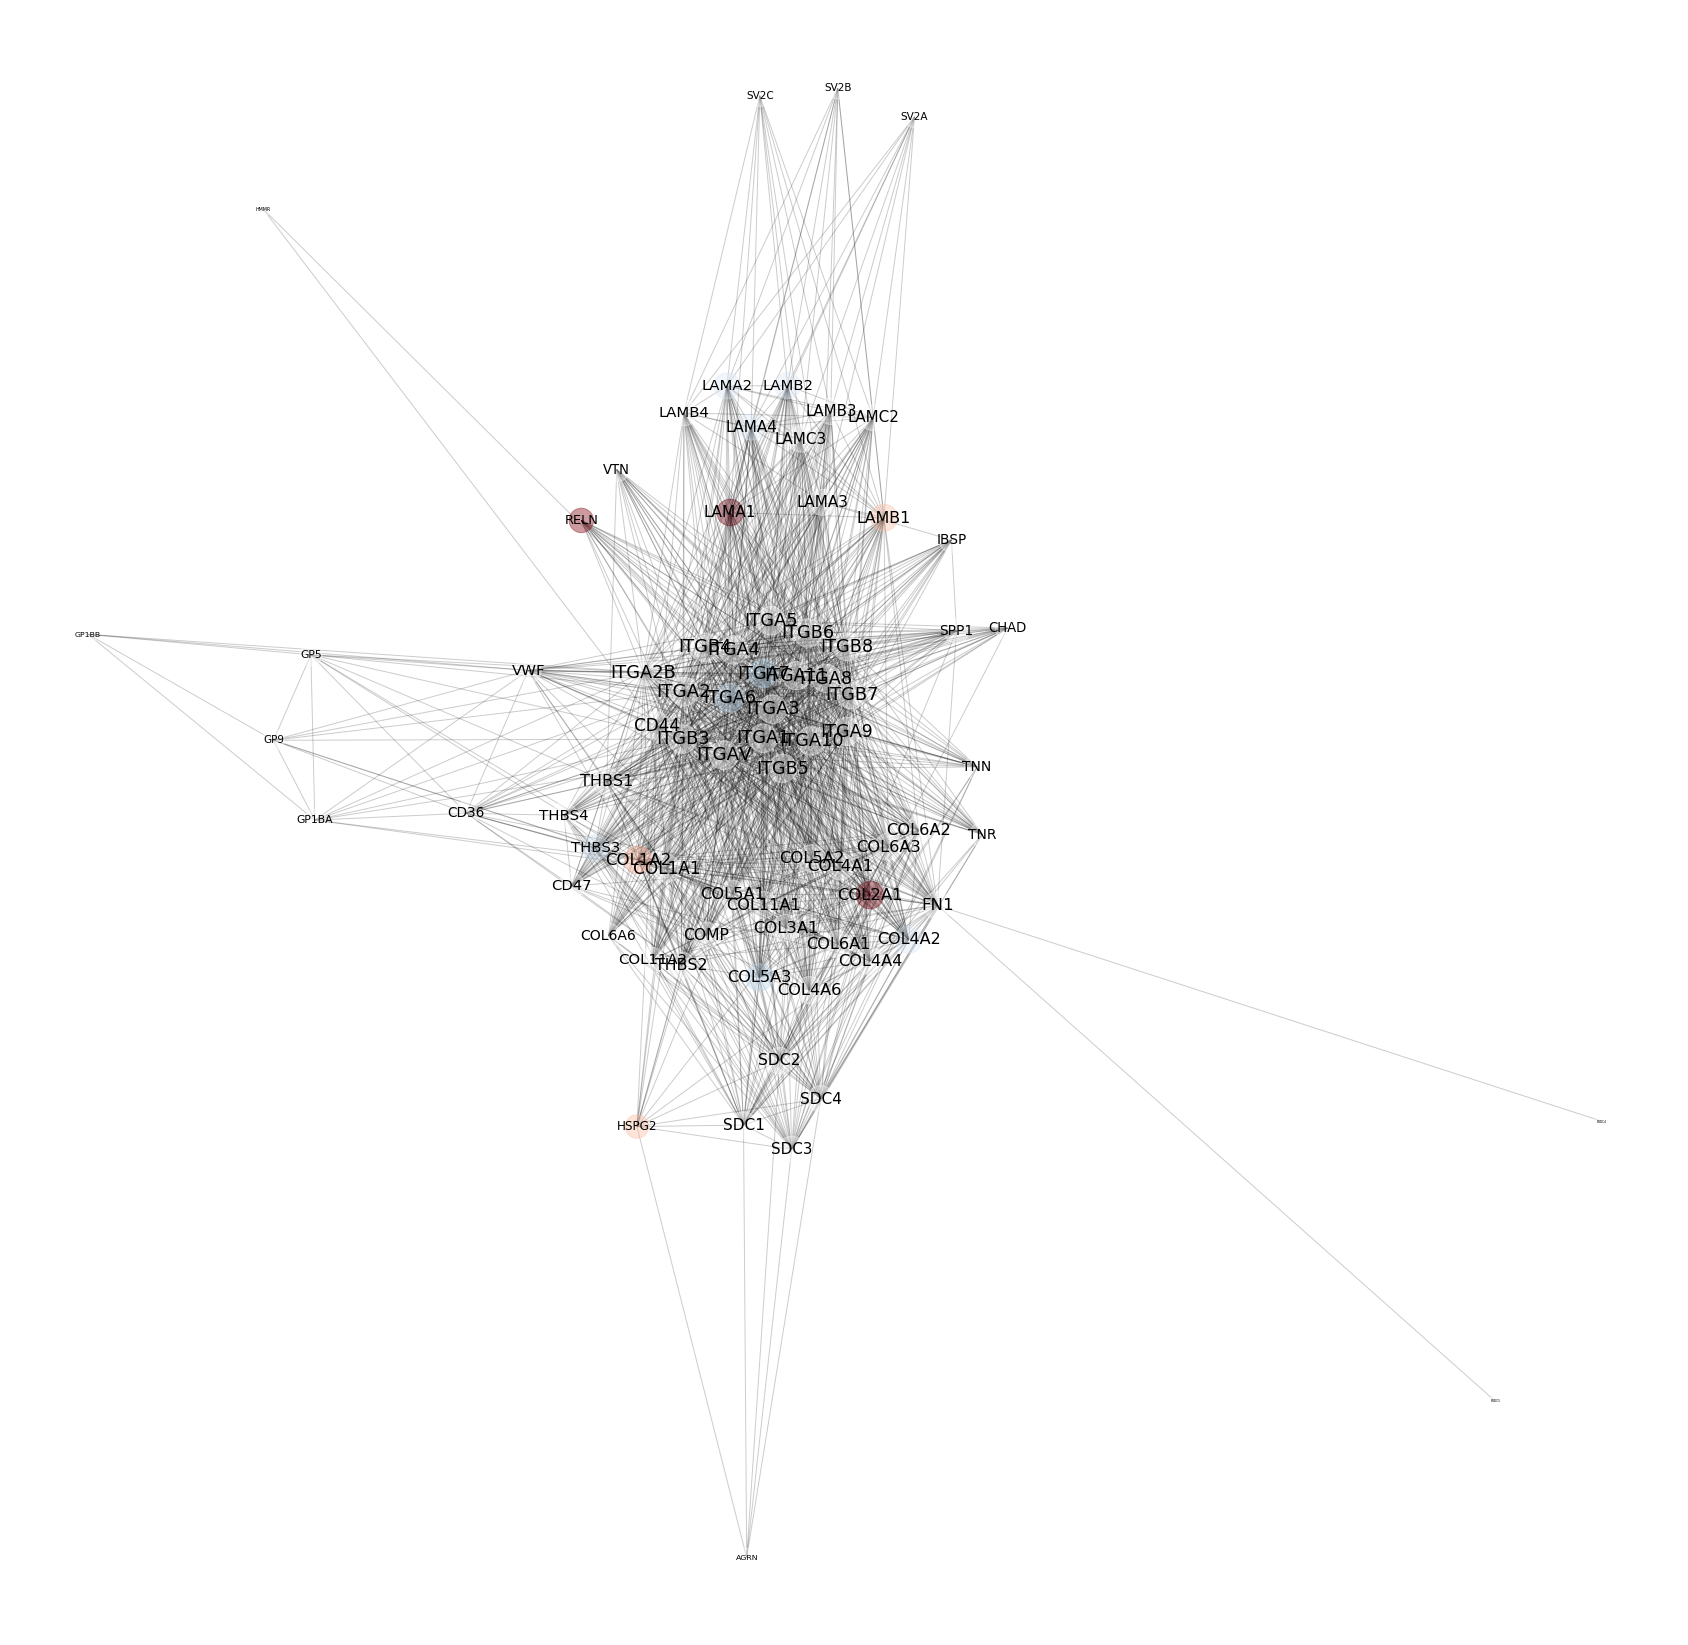

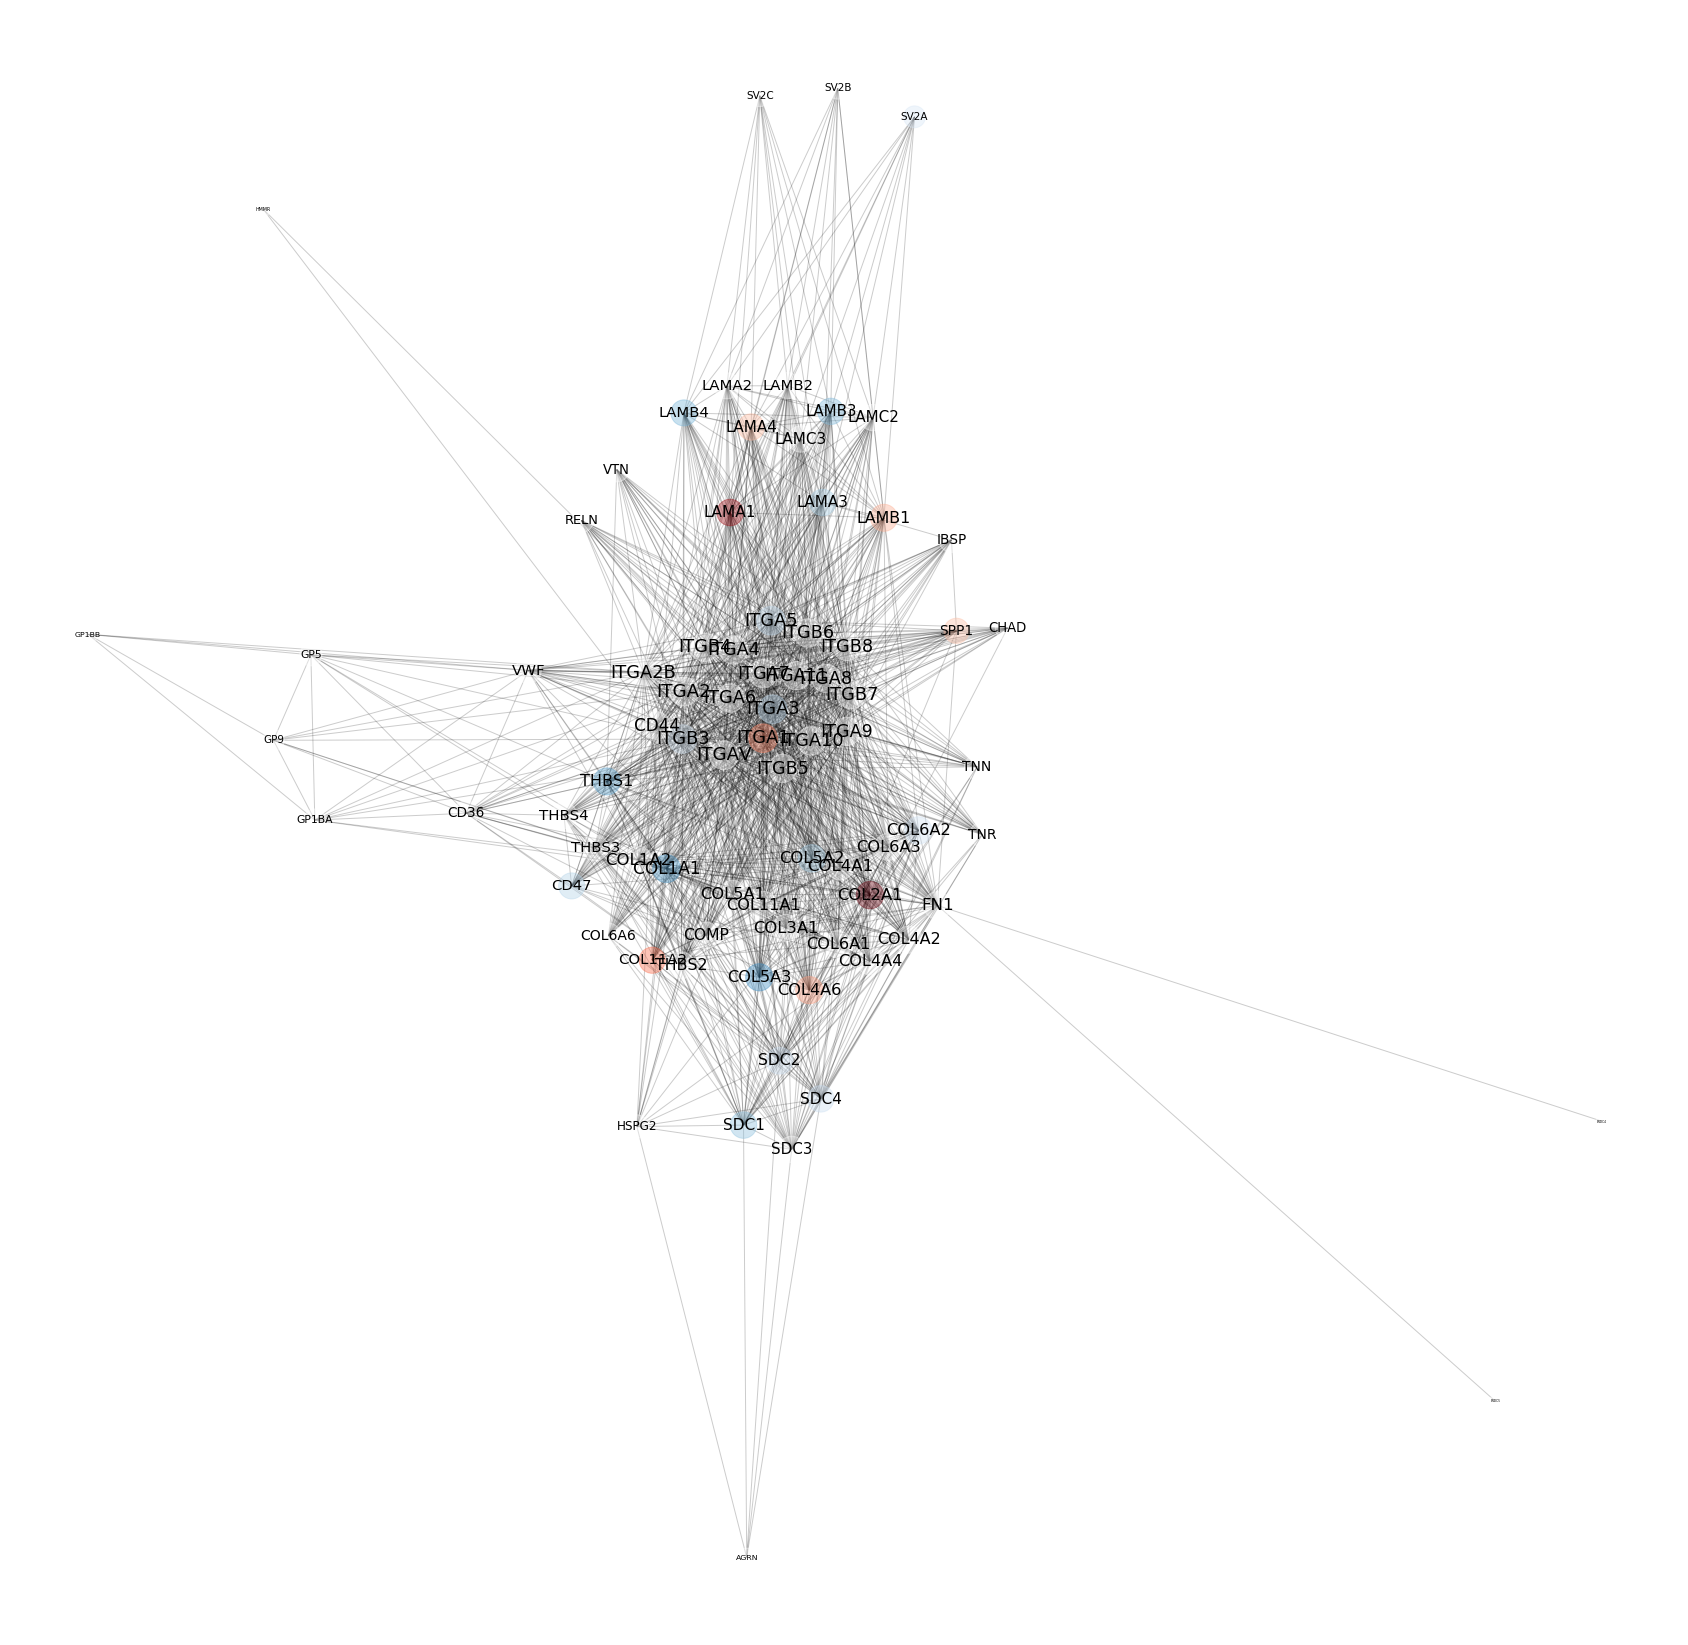

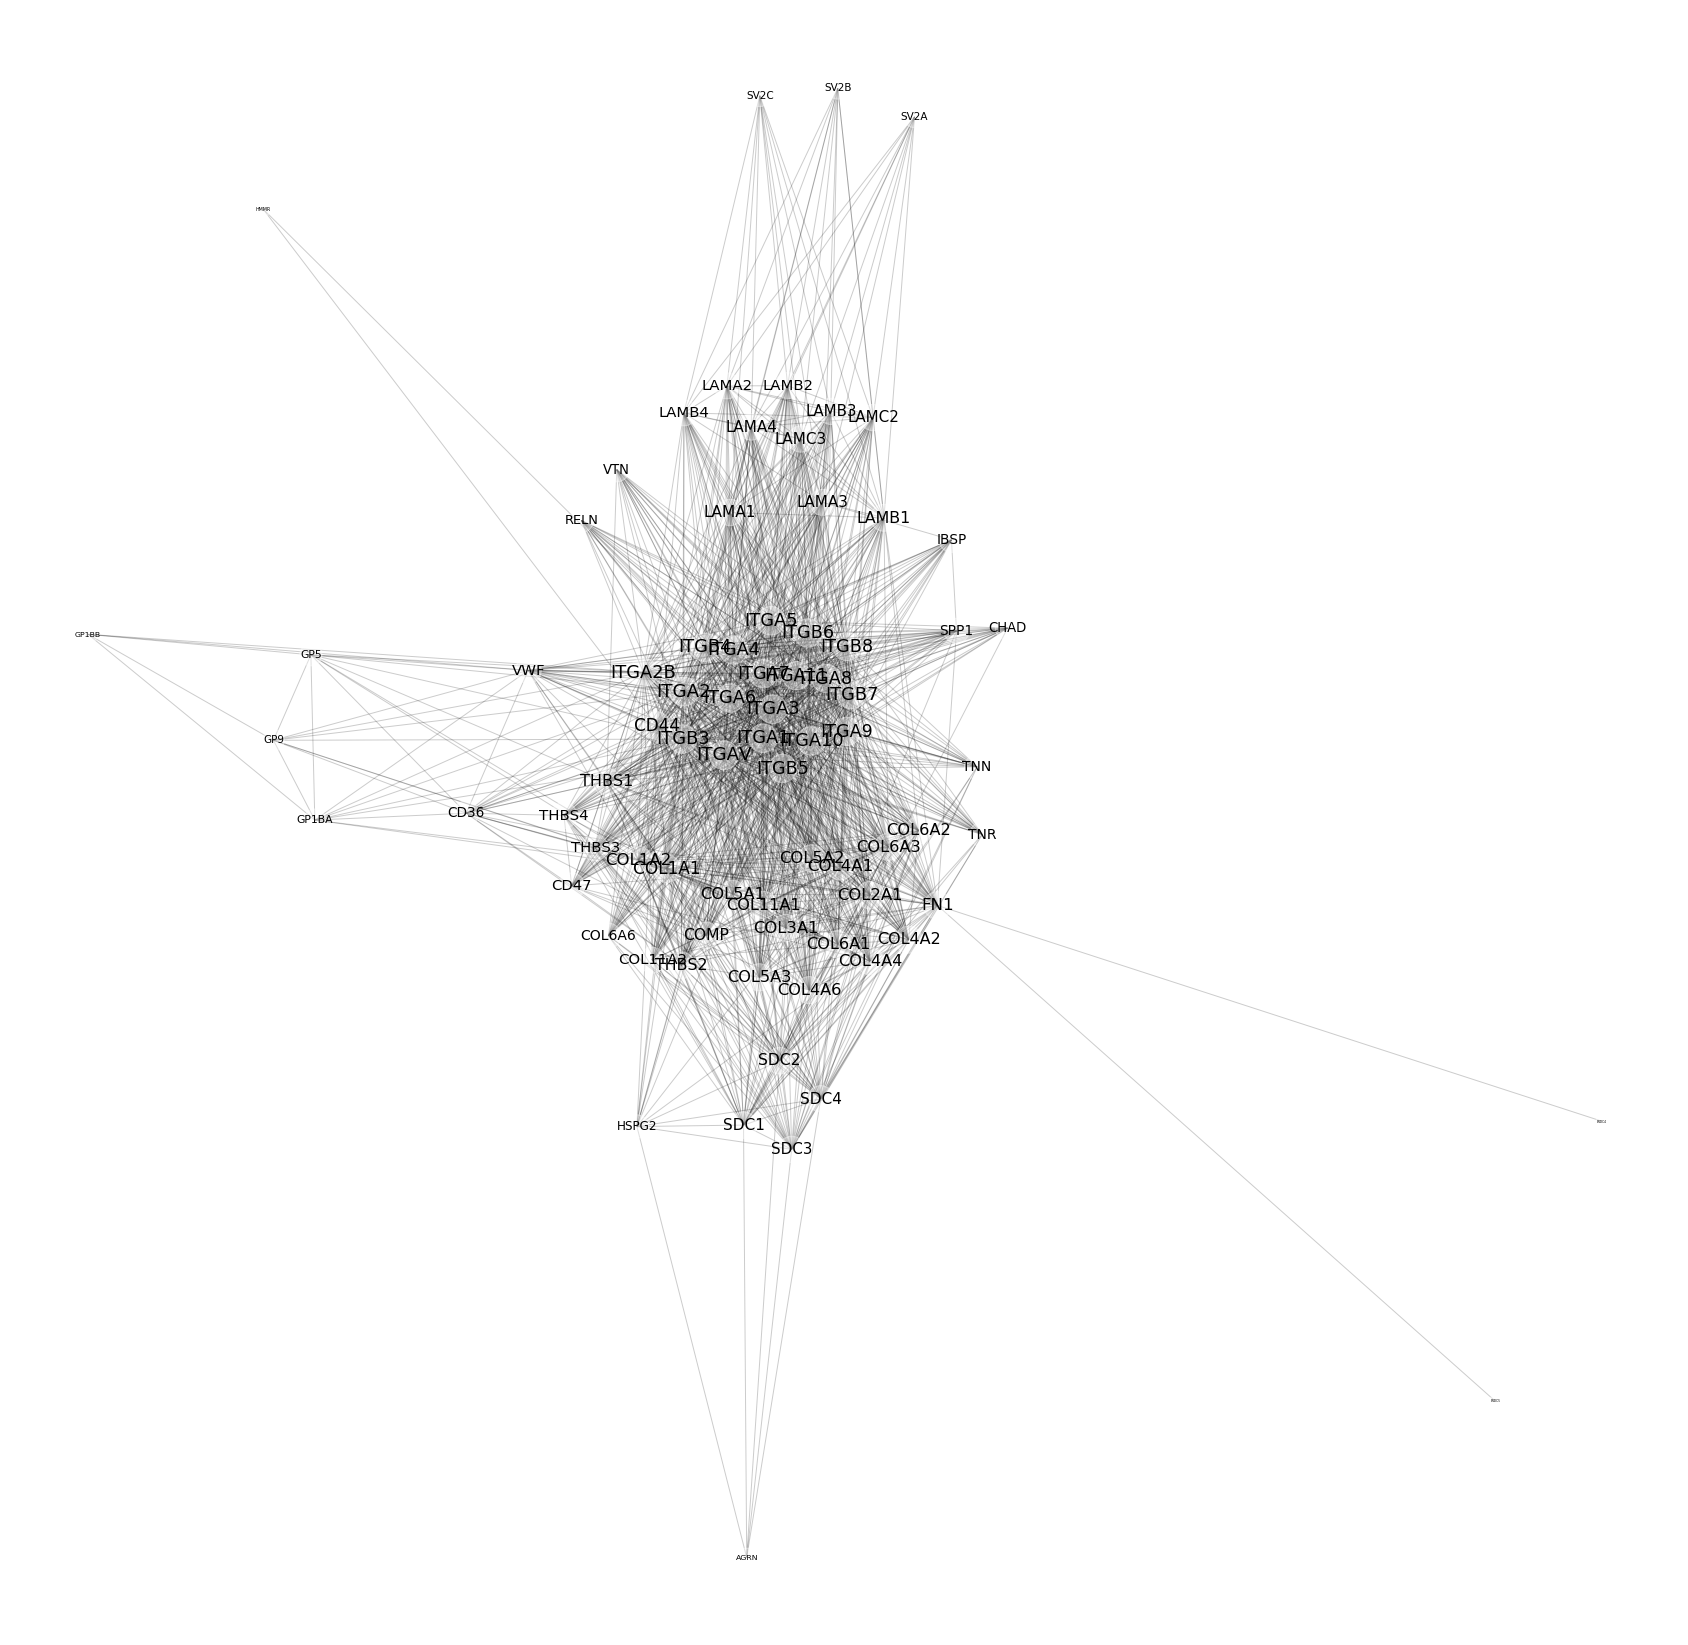

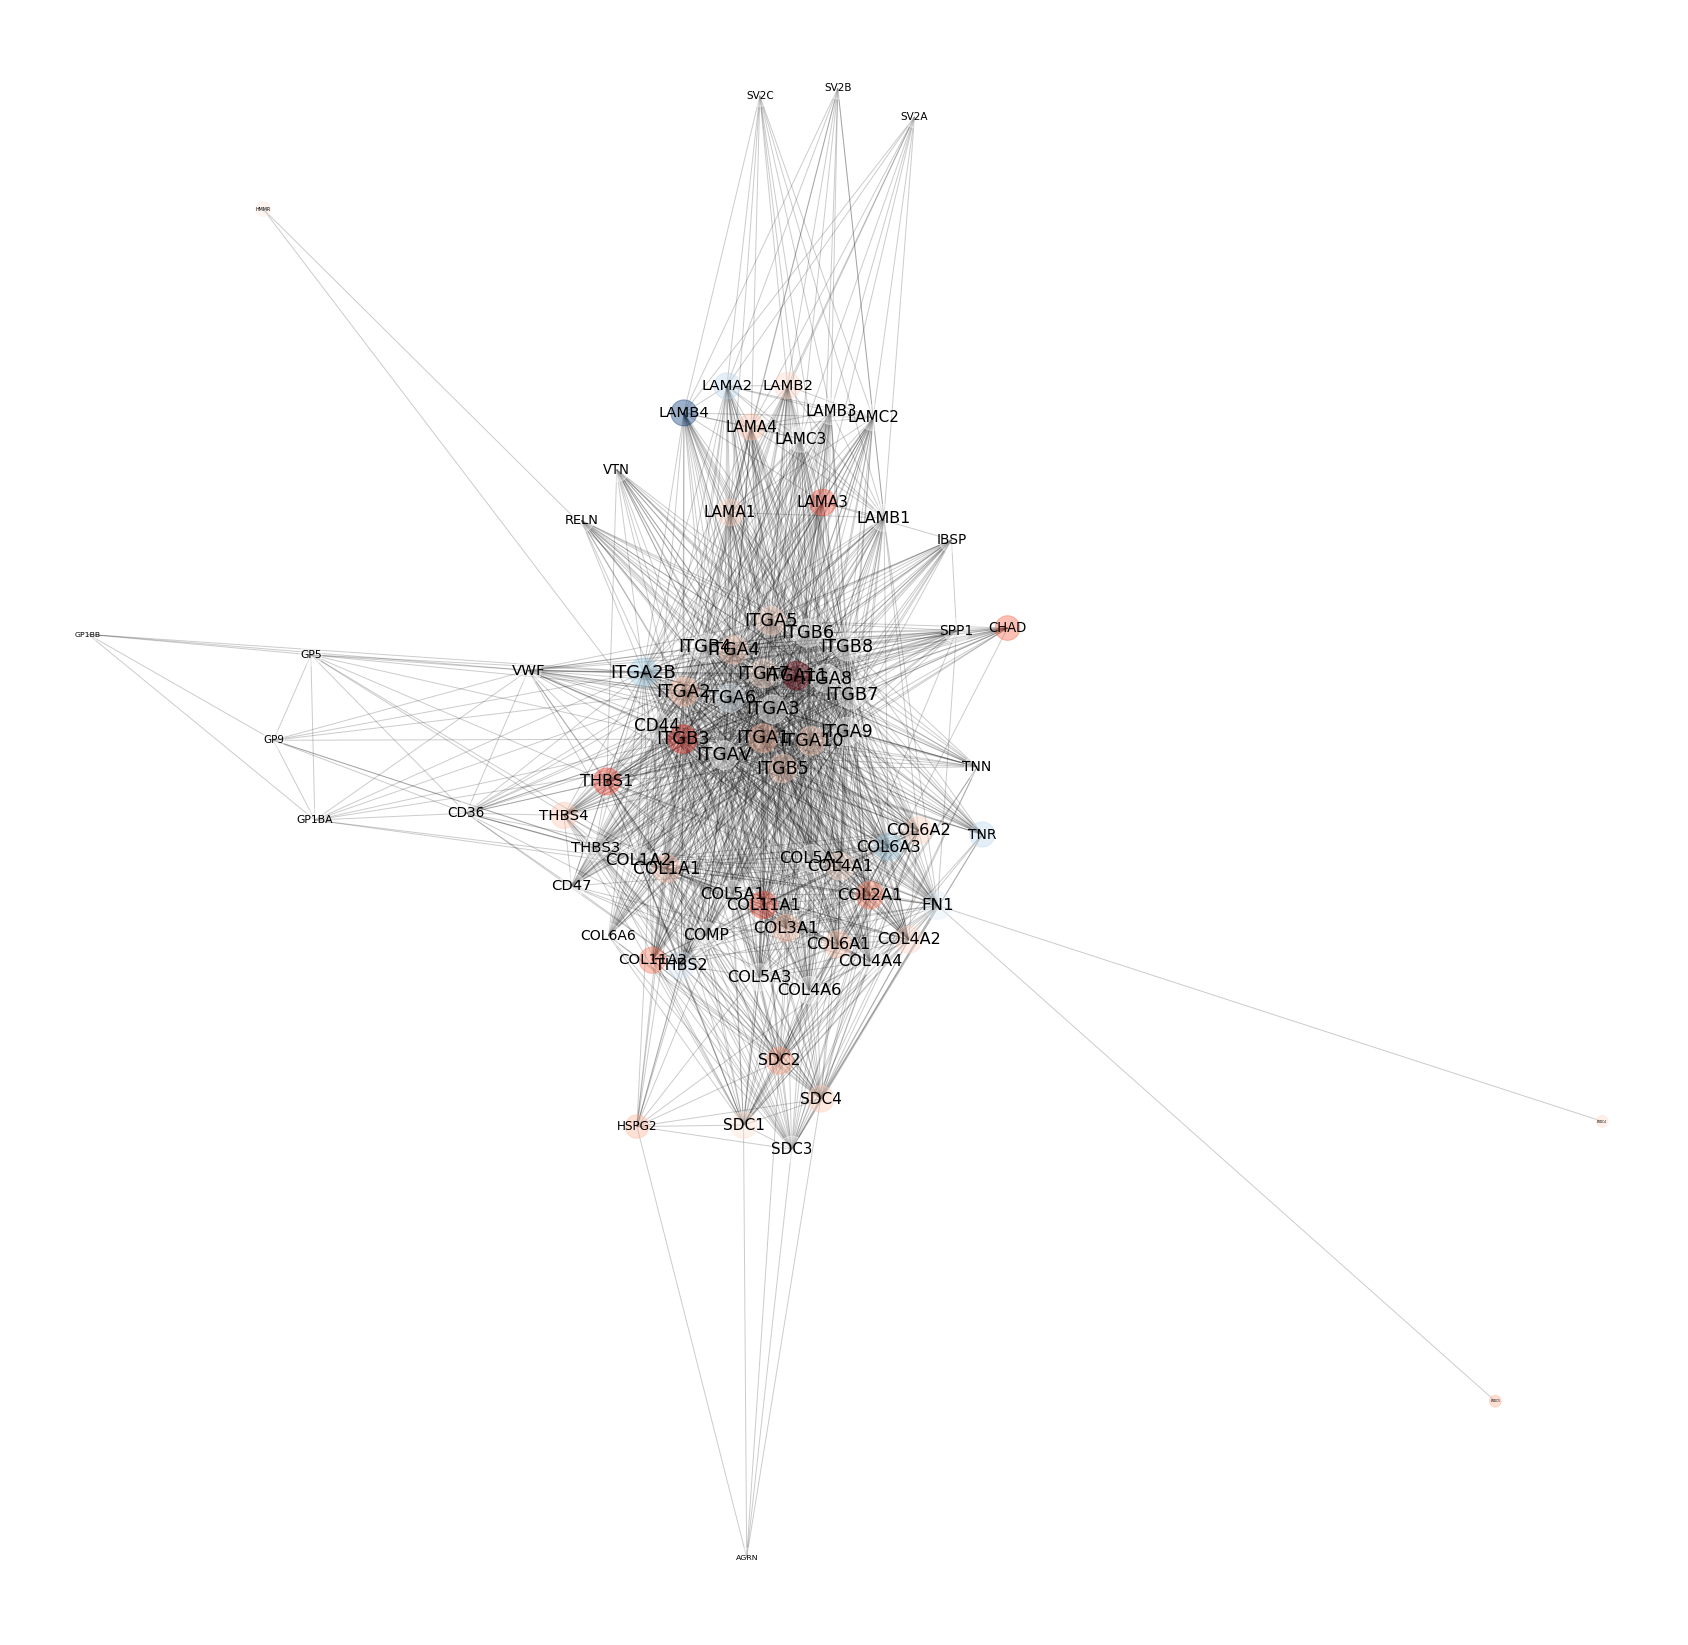

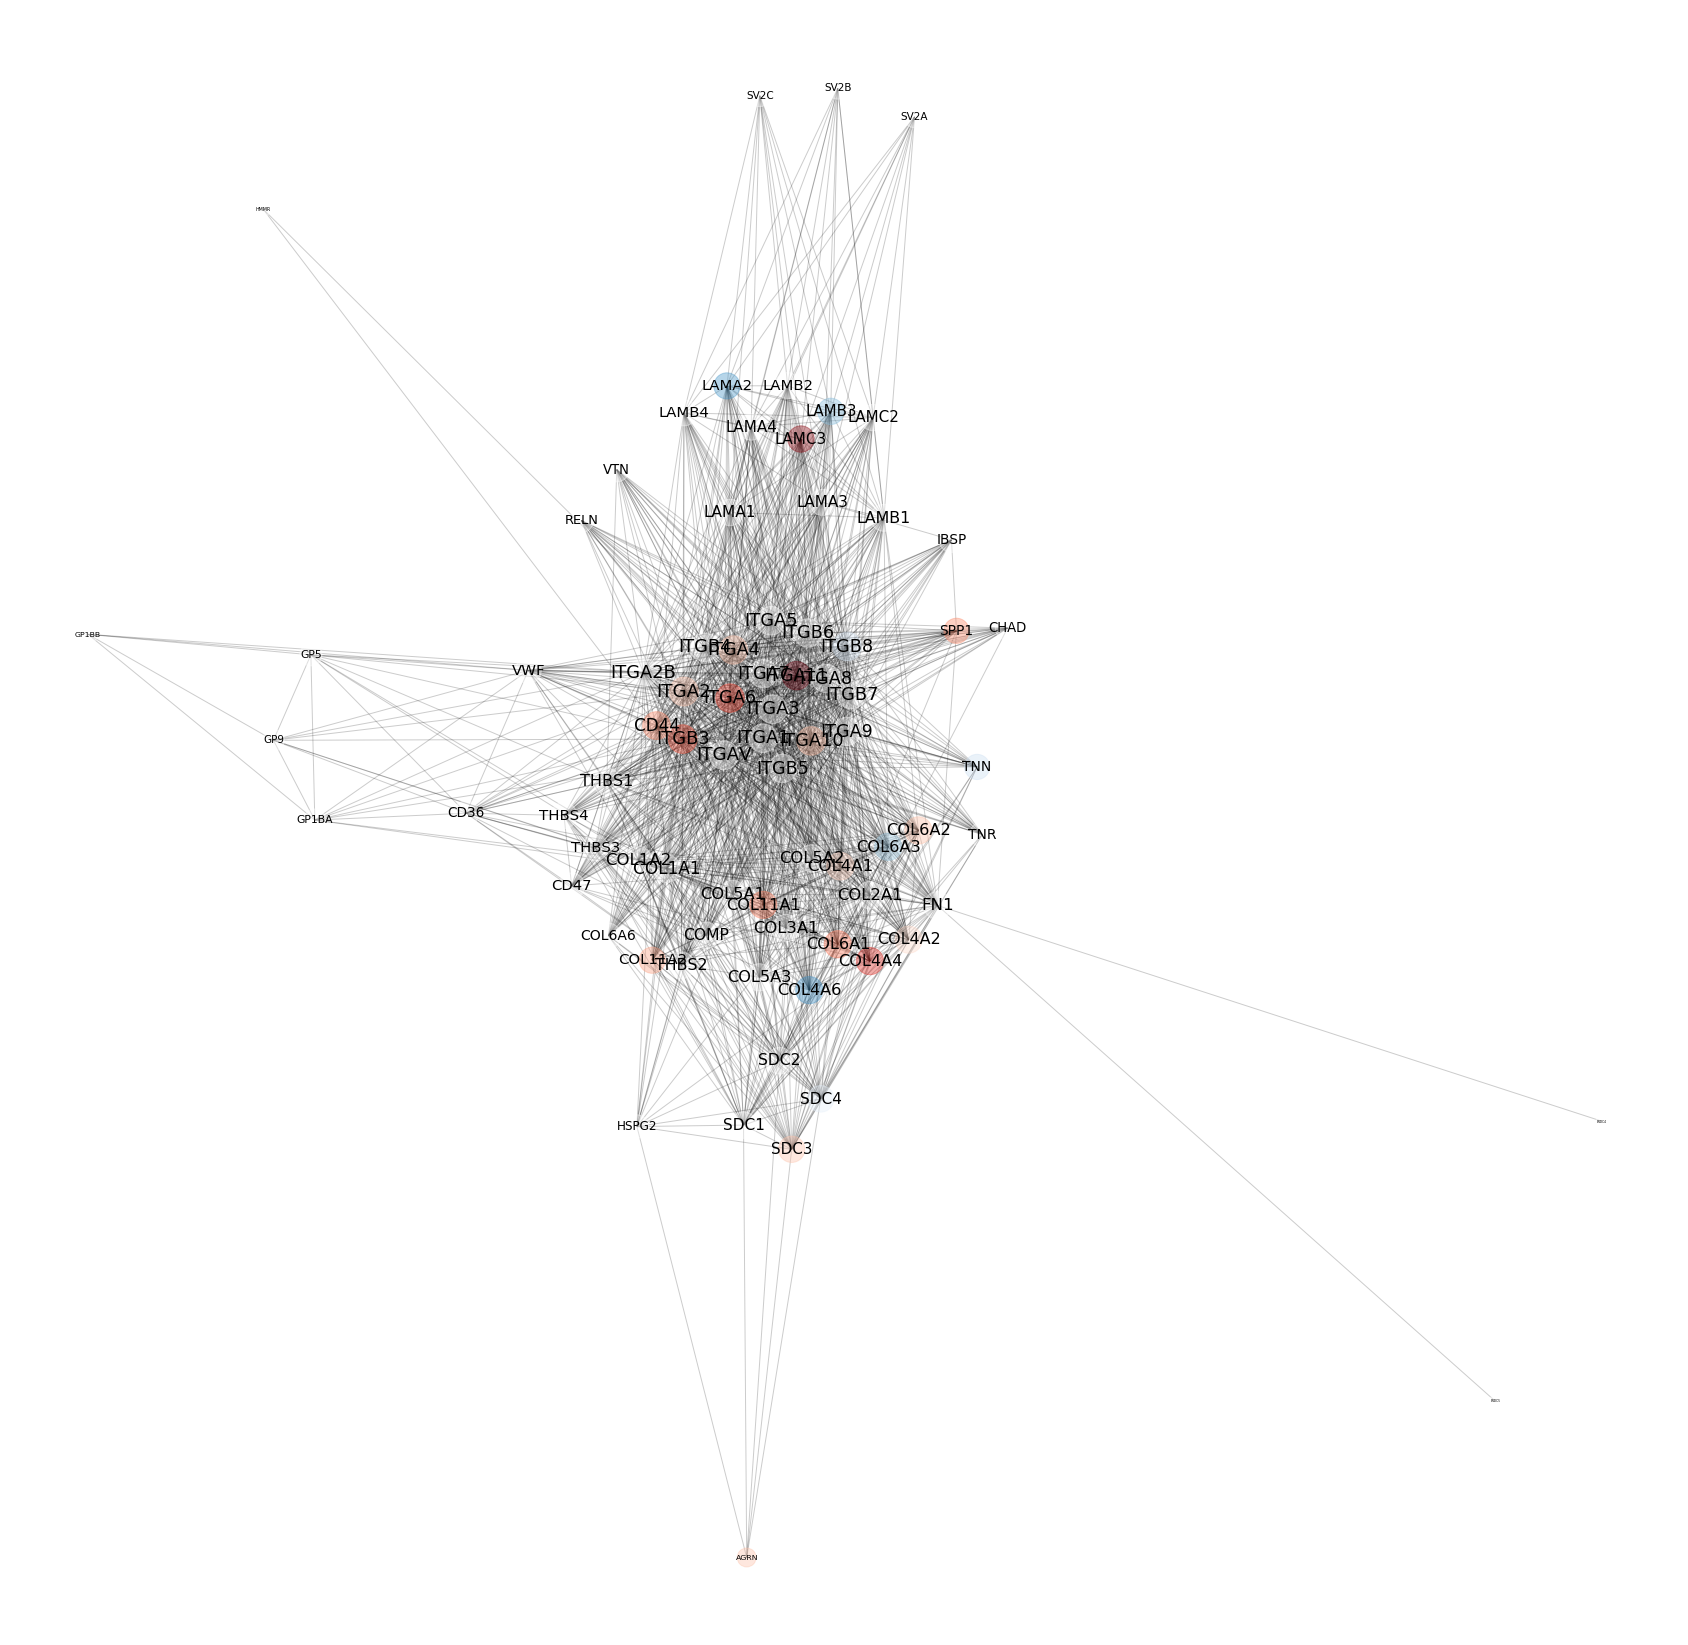

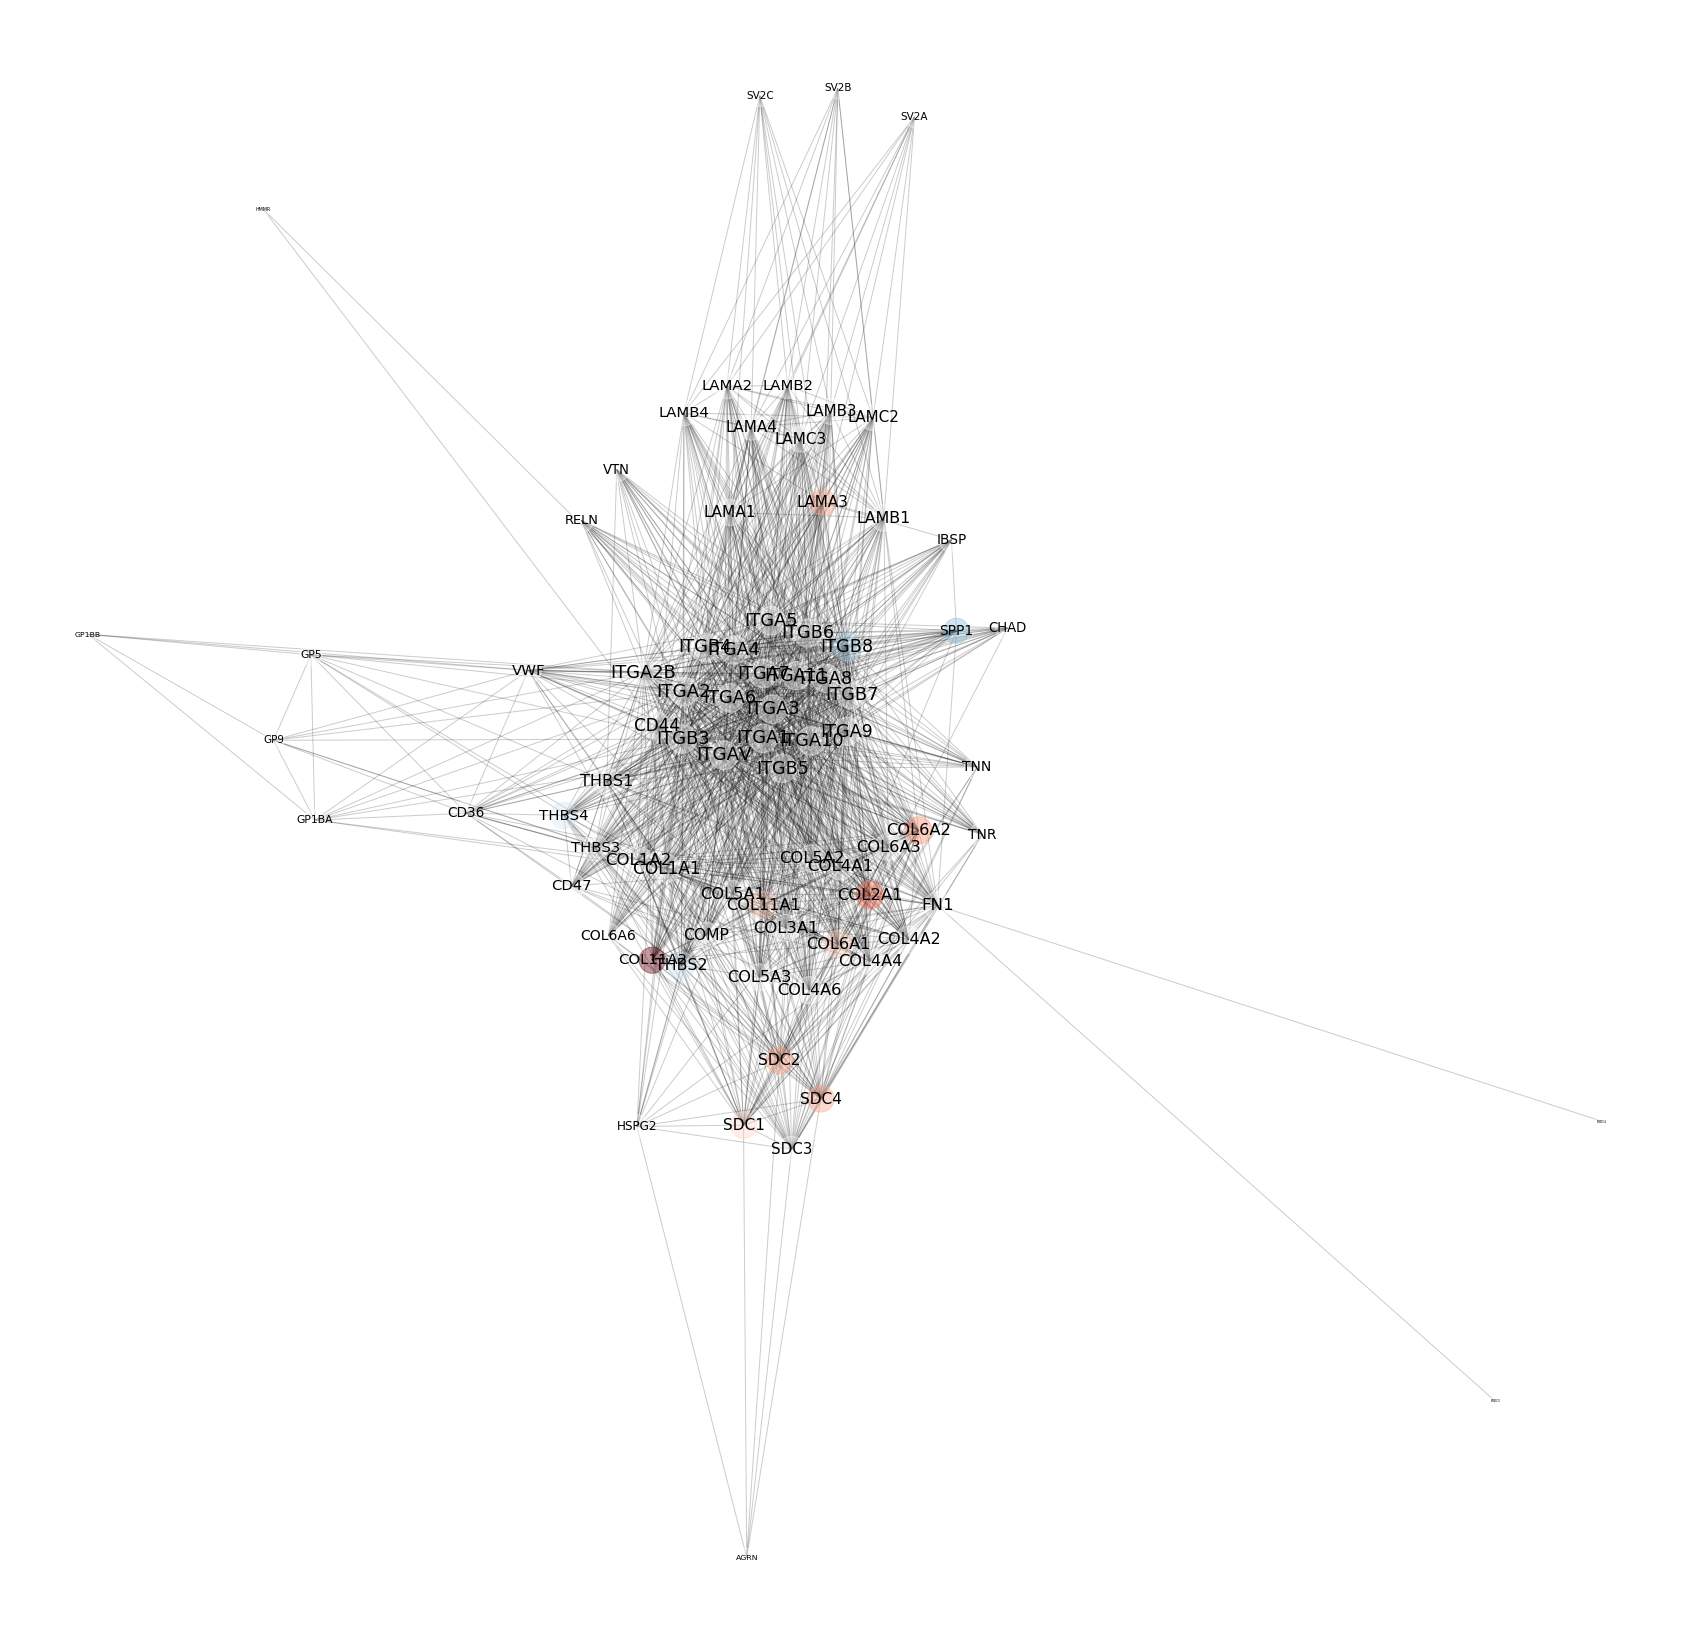

In [15]:
%pylab inline
for i in range(0,len(degs)):
    deg=degs[i]
    sampleName=deg[0]
    deg_results=deg[1]
    genesExp = [x for x in deg_results[['symbol','log2FoldChange']].values.tolist() if str(x[0]) != 'nan']
    # expression data in network
    expInNetwork=np.array(genesExp)[np.logical_or.reduce([np.array(genesExp)[:,0] == x for x in idx2symbol.values()])].tolist()
    if np.size(np.array(expInNetwork))>0:
        zeroInNetwork=[[i,'0'] for i in idx2symbol.values() if i not in np.array(expInNetwork)[:,0]]
    else:
        zeroInNetwork=[[i,'0'] for i in idx2symbol.values()]
    for i in zeroInNetwork:
        expInNetwork.append(i)
    # And a data frame with characteristics for your nodes
    carac = pd.DataFrame({ 'ID':np.array(expInNetwork)[:,0], 'myvalue':[np.float(i) for i in np.array(expInNetwork)[:,1]] })
    # Plot it, providing a continuous color scale with cmap:
    # Here is the tricky part: I need to reorder carac, to assign the good color to each node
    carac= carac.set_index('ID')
    carac=carac.reindex(G.nodes())

    plt=generateNetwork(carac,pos,PPI)


Populating the interactive namespace from numpy and matplotlib
                     G   MIN   PTS   FGM   FGA    FGP  FTM   FTA    FTP  3PM  \
Name                                                                           
Dwyane Wade         79  38.6  30.2  10.8  22.0  0.491  7.5   9.8  0.765  1.1   
LeBron James        81  37.7  28.4   9.7  19.9  0.489  7.3   9.4  0.780  1.6   
Kobe Bryant         82  36.2  26.8   9.8  20.9  0.467  5.9   6.9  0.856  1.4   
Dirk Nowitzki       81  37.7  25.9   9.6  20.0  0.479  6.0   6.7  0.890  0.8   
Danny Granger       67  36.2  25.8   8.5  19.1  0.447  6.0   6.9  0.878  2.7   
Kevin Durant        74  39.0  25.3   8.9  18.8  0.476  6.1   7.1  0.863  1.3   
Kevin Martin        51  38.2  24.6   6.7  15.9  0.420  9.0  10.3  0.867  2.3   
Al Jefferson        50  36.6  23.1   9.7  19.5  0.497  3.7   5.0  0.738  0.0   
Chris Paul          78  38.5  22.8   8.1  16.1  0.503  5.8   6.7  0.868  0.8   
Carmelo Anthony     66  34.5  22.8   8.1  18.3  0.443  5.

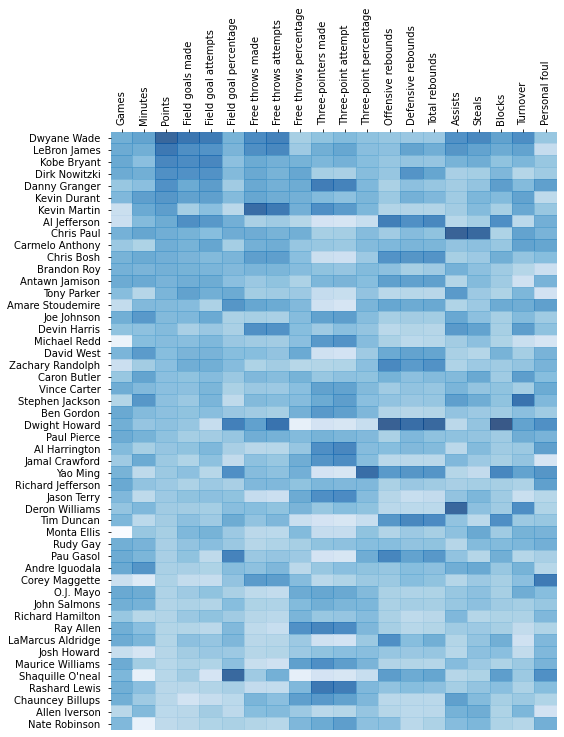

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
#import urlopen
import numpy as np
%pylab inline

#page = urlopen("http://datasets.flowingdata.com/ppg2008.csv")
nba = pd.read_csv('ppg2008.csv', index_col=0)
print(nba)
# Normalize data columns
nba_norm = (nba - nba.mean()) / (nba.max() - nba.min())

# Sort data according to Points, lowest to highest
# This was just a design choice made by Yau
# inplace=False (default) ->thanks SO user d1337
nba_sort = nba_norm

nba_sort['PTS'].head(10)

# Plot it out
fig, ax = plt.subplots()
heatmap = ax.pcolor(nba_sort, cmap=plt.cm.Blues, alpha=0.8)

# Format
fig = plt.gcf()
fig.set_size_inches(8, 11)

# turn off the frame
ax.set_frame_on(False)

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(nba_sort.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(nba_sort.shape[1]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# Set the labels

# label source:https://en.wikipedia.org/wiki/Basketball_statistics
labels = [
    'Games', 'Minutes', 'Points', 'Field goals made', 'Field goal attempts', 'Field goal percentage', 'Free throws made', 'Free throws attempts', 'Free throws percentage',
    'Three-pointers made', 'Three-point attempt', 'Three-point percentage', 'Offensive rebounds', 'Defensive rebounds', 'Total rebounds', 'Assists', 'Steals', 'Blocks', 'Turnover', 'Personal foul']

# note I could have used nba_sort.columns but made "labels" instead
ax.set_xticklabels(labels, minor=False)
ax.set_yticklabels(nba_sort.index, minor=False)

# rotate the
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

In [46]:
nba_sort
sns.clustermap(nba_sort,cmap=newcmp,vmax=Bound,vmin=-Bound,col_linkage=col_linkage,row_linkage=row_linkage,
                          annot=True,annot_kws={"size": annotationSize},cbar_kws={'label':measureLabel }) 

G       MIN       PTS       FGM       FGA  \
Name                                                                   
Dwyane Wade         0.143158  0.233535  0.718308  0.595714  0.561296   
LeBron James        0.178246  0.142626  0.579846  0.399286  0.366852   
Kobe Bryant         0.195789 -0.008889  0.456769  0.417143  0.459444   
Dirk Nowitzki       0.178246  0.142626  0.387538  0.381429  0.376111   
Danny Granger      -0.067368 -0.008889  0.379846  0.185000  0.292778   
Kevin Durant        0.055439  0.273939  0.341385  0.256429  0.265000   
Kevin Martin       -0.348070  0.193131  0.287538 -0.136429 -0.003519   
Al Jefferson       -0.365614  0.031515  0.172154  0.399286  0.329815   
Chris Paul          0.125614  0.223434  0.149077  0.113571  0.015000   
Carmelo Anthony    -0.084912 -0.180606  0.149077  0.113571  0.218704   
Chris Bosh          0.108070  0.183030  0.141385  0.095714  0.042778   
Brandon Roy         0.125614  0.092121  0.133692  0.113571  0.089074   
Antawn Jamison      0.178246  0.193131  0.102923  0.149286  0.172407   
Tony Parker         0.020351 -0.221010  0.087538  0.256429  0.144630   
Amare Stoudemire   -0.312982  0.051717  0.041385  0.024286 -0.170185   
Joe Johnson         0.143158  0.324444  0.041385  0.060000  0.190926   
Devin Harris       -0.032281 -0.018990  0.033692 -0.154286 -0.077593   
Michael Redd       -0.663860  0.011313  0.026000  0.006429  0.061296   
David West          0.090526  0.304242  0.010615  0.095714  0.098333   
Zachary Randolph   -0.365614 -0.120000 -0.004769  0.149286  0.144630   
Caron Butler       -0.067368  0.233535 -0.004769 -0.029286  0.024259   
Vince Carter        0.160702  0.051717 -0.004769 -0.011429  0.079815   
Stephen Jackson    -0.207719  0.344646 -0.012462 -0.082857  0.089074   
Ben Gordon          0.195789  0.031515 -0.012462 -0.029286  0.005741   
Dwight Howard       0.143158 -0.059394 -0.020154 -0.065000 -0.327593   
Paul Pierce         0.178246  0.112323 -0.027846 -0.136429 -0.123889   
Al Harrington       0.037895 -0.140202 -0.058615 -0.029286  0.061296   
Jamal Crawford     -0.102456  0.183030 -0.089385 -0.190000 -0.022037   
Yao Ming            0.108070 -0.271515 -0.089385 -0.011429 -0.235000   
Richard Jefferson   0.195789 -0.039192 -0.097077 -0.172143 -0.096111   
Jason Terry         0.055439 -0.271515 -0.097077 -0.029286 -0.012778   
Deron Williams     -0.049825  0.061818 -0.112462 -0.118571 -0.133148   
Tim Duncan          0.072982 -0.261414 -0.120154 -0.011429 -0.105370   
Monta Ellis        -0.804211 -0.069495 -0.143231  0.060000  0.116852   
Rudy Gay            0.143158  0.102222 -0.150923 -0.047143  0.005741   
Pau Gasol           0.178246  0.082020 -0.150923 -0.029286 -0.281296   
Andre Iguodala      0.195789  0.354747 -0.158615 -0.154286 -0.179444   
Corey Maggette     -0.348070 -0.524040 -0.174000 -0.315000 -0.327593   
O.J. Mayo           0.195789  0.172929 -0.181692 -0.100714 -0.031296   
John Salmons        0.143158  0.122424 -0.197077 -0.172143 -0.197963   
Richard Hamilton   -0.067368 -0.231111 -0.197077 -0.082857 -0.031296   
Ray Allen           0.143158  0.001212 -0.204769 -0.207857 -0.253519   
LaMarcus Aldridge   0.178246  0.082020 -0.212462 -0.011429 -0.059074   
Josh Howard        -0.330526 -0.443232 -0.220154 -0.118571 -0.077593   
Maurice Williams    0.178246 -0.130101 -0.235538 -0.172143 -0.188704   
Shaquille O'neal    0.072982 -0.625051 -0.235538 -0.118571 -0.438704   
Rashard Lewis       0.143158 -0.008889 -0.243231 -0.243571 -0.197963   
Chauncey Billups    0.143158 -0.099798 -0.243231 -0.404286 -0.327593   
Allen Iverson      -0.242807  0.041616 -0.258615 -0.243571 -0.123889   
Nate Robinson       0.055439 -0.645253 -0.281692 -0.243571 -0.188704   

                         FGP       FTM       FTA       FTP       3PM  \
Name                                                                   
Dwyane Wade         0.106030  0.431875  0.498987 -0.143017 -0.032143   
LeBron James        0.095980  0.400625  0.448354 -0.101117  0.1464

In [3]:
# color map to hex
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [24]:
top = cm.get_cmap('Blues_r', 56)
bottom = cm.get_cmap('Reds', 56)
newcolors = np.vstack((top(np.linspace(0, 1, 56)),([[1,1,1,0]]),
               bottom(np.linspace(0, 1, 56))))
hex_map = [matplotlib.colors.to_hex(i, keep_alpha=True) for i in newcolors]

In [39]:
len(hex_map)
hex_map[0]
np.ceil()

'#08306bff'

In [44]:
x = [1,3,5,-7.2]
print(x/max(np.abs(x))*56)
[hex_map[int(i)] for i in x/max(np.abs(x))*56+56]

[  7.77777778  23.33333333  38.88888889 -56.        ]


['#fee3d6ff', '#fc8a6aff', '#e12e26ff', '#08306bff']

In [1]:
        length = len(pag_ids)*0.43+1
        #print(length)
        fig, ax = plt.subplots(figsize=(5, length))
        
        # parameters in the heatmap setting 
        width_ratio = 1

        
        annotationSize = 5

            
        
        col_linkage = hc.linkage(sp.distance.pdist(mtx.T), method='ward')
        row_linkage = hc.linkage(sp.distance.pdist(mtx), method='ward')
        
        # load the color scale using the cm
        top = cm.get_cmap('Blues_r', 56)
        bottom = cm.get_cmap('Reds', 56)
        newcolors = np.vstack(
                                (
                                    top(np.linspace(0, 1, 56)),
                                    ([[0,0,0,0.1]]),
                                    bottom(np.linspace(0, 1, 56))
                                )
                             )
        newcmp = ListedColormap(newcolors, name='RedBlue')
        # set the balance point of the expression to 0
        f_max = np.max(mtx)
        f_min = np.min(mtx)
        
        if(abs(f_max)>abs(f_min)):
            Bound=abs(f_max)
        else:
            Bound=abs(f_min)
           
        # figure size in inches
        #rcParams['figure.figsize'] = 3,8.27
        expMtxsDF = pd.DataFrame(mtx)
        expMtxsDF.columns = deg_names
        expMtxsDF.index = pag_ids
        #sns.set(font_scale=1,rc={'figure.figsize':(3,8.27)})
        
        print('rowCluster' in kwargs.keys() & 'colCluster' in kwargs.keys())
        if('rowCluster' in kwargs.keys() & 'colCluster' in kwargs.keys()): 
            g = sns.clustermap(mtx,cmap=newcmp,vmax=Bound,vmin=-Bound,col_linkage=col_linkage,row_linkage=row_linkage,
                          annot=True,annot_kws={"size": 10},cbar_kws={'label':10 })        
        elif('rowCluster' in kwargs.keys()): 
            g = sns.clustermap(mtx,cmap=newcmp,vmax=Bound,vmin=-Bound,row_linkage=row_linkage,
                          annot=True,annot_kws={"size": 10},cbar_kws={'label':10 })
        elif('colCluster' in kwargs.keys()): 
            g = sns.clustermap(mtx,cmap=newcmp,vmax=Bound,vmin=-Bound,col_linkage=col_linkage,
                          annot=True,annot_kws={"size": 10},cbar_kws={'label':10 })  
        else:
            g = sns.clustermap(mtx,cmap=newcmp,vmax=Bound,vmin=-Bound,row_cluster=False,
                          annot=True,annot_kws={"size": 10},cbar_kws={'label':10 })  
            #g.ax_row_dendrogram.set_xlim([0,0])
        rotation = 90 
        g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
        g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10)
        plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=10)
        plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=60, fontsize=10)
        hm = g.ax_heatmap.get_position()
        
        
        g.ax_heatmap.set_position([hm.x0, hm.y0, hm.width*width_ratio, hm.height])
        col = g.ax_col_dendrogram.get_position()
        g.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*width_ratio, col.height*0.5])
        #for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
        #    ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
        
        bottom, top = g.ax_heatmap.get_ylim()
        #g.ax_heatmap.set_ylim(bottom + 0.5, top - 0.5)
       
    
        plt.rcParams["axes.grid"] = False
        
        plt.show()
        

NameError: name 'pag_ids' is not defined

In [1]:
%matplotlib inline

import plotly
import matplotlib as plt
import numpy as np
import seaborn as sns

plotly.offline.init_notebook_mode()

np.random.seed(2017)

data = np.random.randn(10, 20)
sns.heatmap(data)

mpl_fig = plt.pyplot.gcf()
plotly_fig = plotly.tools.mpl_to_plotly(mpl_fig)
plotly_fig['data'] = [dict(z=data, type="heatmap")]
plotly.offline.iplot(plotly_fig)

e:\anaconda3_64\envs\py38_64\lib\site-packages\plotly\matplotlylib\mplexporter\exporter.py:289: MatplotlibDeprecationWarning:


The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

e:\anaconda3_64\envs\py38_64\lib\site-packages\plotly\matplotlylib\renderer.py:574: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates



ValueError: The data property of a figure may only be assigned 
a list or tuple that contains a permutation of a subset of itself.
    Received element value of type <class 'dict'>

In [7]:
sns.heatmap(data)
mpl_fig = plt.pyplot.gcf()
plotly_fig = plotly.tools.mpl_to_plotly(mpl_fig)
plotly_fig['data'] = [dict(z=data, type="heatmap")]
plotly.offline.iplot(plotly_fig)

ValueError: The data property of a figure may only be assigned 
a list or tuple that contains a permutation of a subset of itself.
    Received element value of type <class 'dict'>

In [10]:
data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab 3",
names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()
labels = data.dtype.names

InvalidURL: URL can't contain control characters. '/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab 3' (found at least ' ')